In [3]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go # add details
import plotly.express as px
from plotly.subplots import make_subplots

!pip install colorama
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore #for adding colours

In [4]:
#Bitcoin is a decentralized digital currency that operates on a peer-to-peer network without a central authority.
bitcoindf = pd.read_csv(r"/content/BTC-USD.csv")
bitcoindf = bitcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
bitcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2022-04-03,45859.128906,47313.476563,45634.105469,46453.566406,46453.566406,2.541440e+10
1,2022-04-04,46445.273438,46791.089844,45235.816406,46622.675781,46622.675781,3.249979e+10
2,2022-04-05,46624.507813,47106.140625,45544.808594,45555.992188,45555.992188,2.964060e+10
3,2022-04-06,45544.355469,45544.355469,43193.953125,43206.738281,43206.738281,3.939340e+10
4,2022-04-07,43207.500000,43860.699219,42899.906250,43503.847656,43503.847656,2.610197e+10


In [5]:
bitcoindf.shape

(732, 7)

In [6]:
#Dogecoin
#Dogecoin is primarily used for tipping users on Reddit and Twitter,
#but it is also accepted as a method of payment by a few dozen merchants.
dogecoindf = pd.read_csv(r"/content/DOGE-USD.csv")
dogecoindf = dogecoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
dogecoindf.head()

,date,open,high,low,close,adj_close,volume
0,2022-04-03,0.138903,0.148558,0.137088,0.146453,0.146453,1.047399e+09
1,2022-04-04,0.146413,0.155312,0.142008,0.148591,0.148591,2.253510e+09
2,2022-04-05,0.148614,0.178045,0.147727,0.172907,0.172907,5.230289e+09
3,2022-04-06,0.172485,0.173497,0.143291,0.143417,0.143417,3.729048e+09
4,2022-04-07,0.143432,0.148028,0.141312,0.146102,0.146102,1.420791e+09


In [7]:
#Ethereum
#Ethereum operates on a decentralized computer network, or distributed ledger called a blockchain, which manages and tracks the currency.
#It can be useful to think of a blockchain like a running receipt of every transaction that's ever taken place in the cryptocurrency.

ethereumdf = pd.read_csv(r"/content/ETH-USD.csv")
ethereumdf = ethereumdf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
ethereumdf.head()

,date,open,high,low,close,adj_close,volume
0,2022-04-03,3444.810547,3573.960205,3421.259766,3522.833496,3522.833496,1.533381e+10
1,2022-04-04,3522.364990,3535.148193,3422.000977,3521.241211,3521.241211,1.820997e+10
2,2022-04-05,3521.239746,3546.706787,3410.547607,3411.792480,3411.792480,1.668150e+10
3,2022-04-06,3411.672119,3411.672119,3171.205078,3171.691895,3171.691895,2.563256e+10
4,2022-04-07,3172.197266,3263.474609,3155.581055,3233.274658,3233.274658,1.674550e+10


In [8]:
#Cardano
#The cardano blockchain can be used to build smart contracts, and in turn, create decentralized applications and protocols. Additionally,
#the ability to send and receive funds instantly through, for minimal fees, have many applications in the world of business and finance.

cardanodf = pd.read_csv(r"/content/ADA-USD.csv")
cardanodf = cardanodf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
cardanodf.head()

,date,open,high,low,close,adj_close,volume
0,2022-04-03,1.155909,1.198543,1.146687,1.185941,1.185941,9.767258e+08
1,2022-04-04,1.185800,1.240358,1.165493,1.212945,1.212945,2.447779e+09
2,2022-04-05,1.213029,1.217393,1.167548,1.170801,1.170801,1.188106e+09
3,2022-04-06,1.170792,1.171607,1.052379,1.052771,1.052771,1.710318e+09
4,2022-04-07,1.053129,1.098469,1.045138,1.091894,1.091894,1.139698e+09


In [9]:
bitcoindf = bitcoindf.fillna(method = 'ffill')
dogecoindf = dogecoindf.fillna(method = 'ffill')
ethereumdf = ethereumdf.fillna(method = 'ffill')
cardanodf = cardanodf.fillna(method = 'ffill')

<ipython-input-9-ddff671723f0>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bitcoindf = bitcoindf.fillna(method = 'ffill')
<ipython-input-9-ddff671723f0>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dogecoindf = dogecoindf.fillna(method = 'ffill')
<ipython-input-9-ddff671723f0>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ethereumdf = ethereumdf.fillna(method = 'ffill')
<ipython-input-9-ddff671723f0>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cardanodf = cardanodf.fillna(method = 'ffill')


In [10]:
#Convert Date column into Datatime format
bitcoindf['date'] = pd.to_datetime(bitcoindf.date)

In [11]:
dogecoindf['date'] = pd.to_datetime(dogecoindf.date)

In [12]:
ethereumdf['date'] = pd.to_datetime(ethereumdf.date)

In [13]:
cardanodf['date'] = pd.to_datetime(cardanodf.date)

Text(0.5, 1.0, 'Ethereum Close Price')

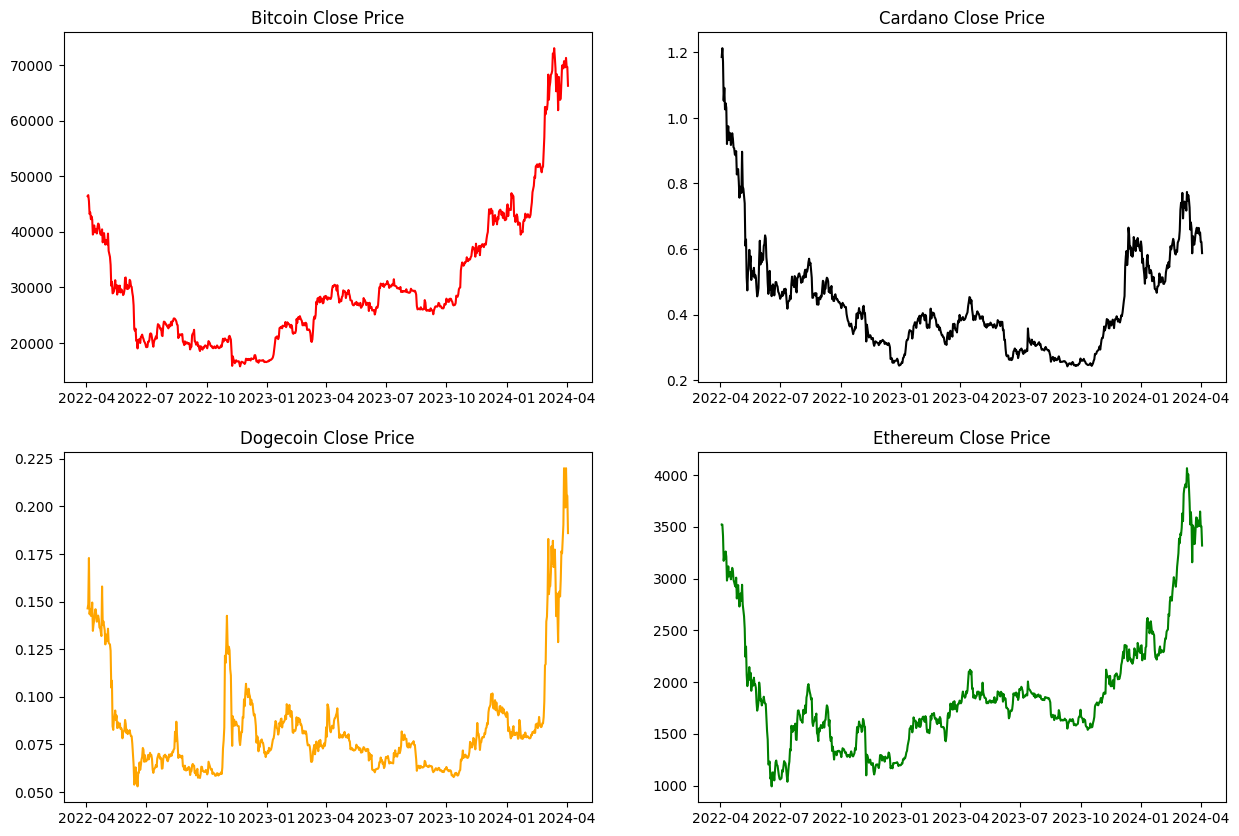

In [14]:
#Plotting close price of Bitcoin, Cardano, Dogecoin and Ethereum

fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'], color="red")
plt.title('Bitcoin Close Price')

plt.subplot(2, 2, 2)
plt.plot(cardanodf['date'], cardanodf['close'], color="black")
plt.title('Cardano Close Price')

plt.subplot(2, 2, 3)
plt.plot(dogecoindf['date'], dogecoindf['close'], color="orange")
plt.title('Dogecoin Close Price')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'], color="green")
plt.title('Ethereum Close Price')

In [15]:
#Plotting only 2020-2021 year close price of Bitcoin, Cardano, Dogecoin and Ethereum
last1year_bitcoindf = bitcoindf[bitcoindf['date'] > '09-2020']
last1year_cardanodf = cardanodf[cardanodf['date'] > '09-2020']
last1year_dogecoindf = dogecoindf[dogecoindf['date'] > '09-2020']
last1year_ethereumdf = ethereumdf[ethereumdf['date'] > '09-2020']

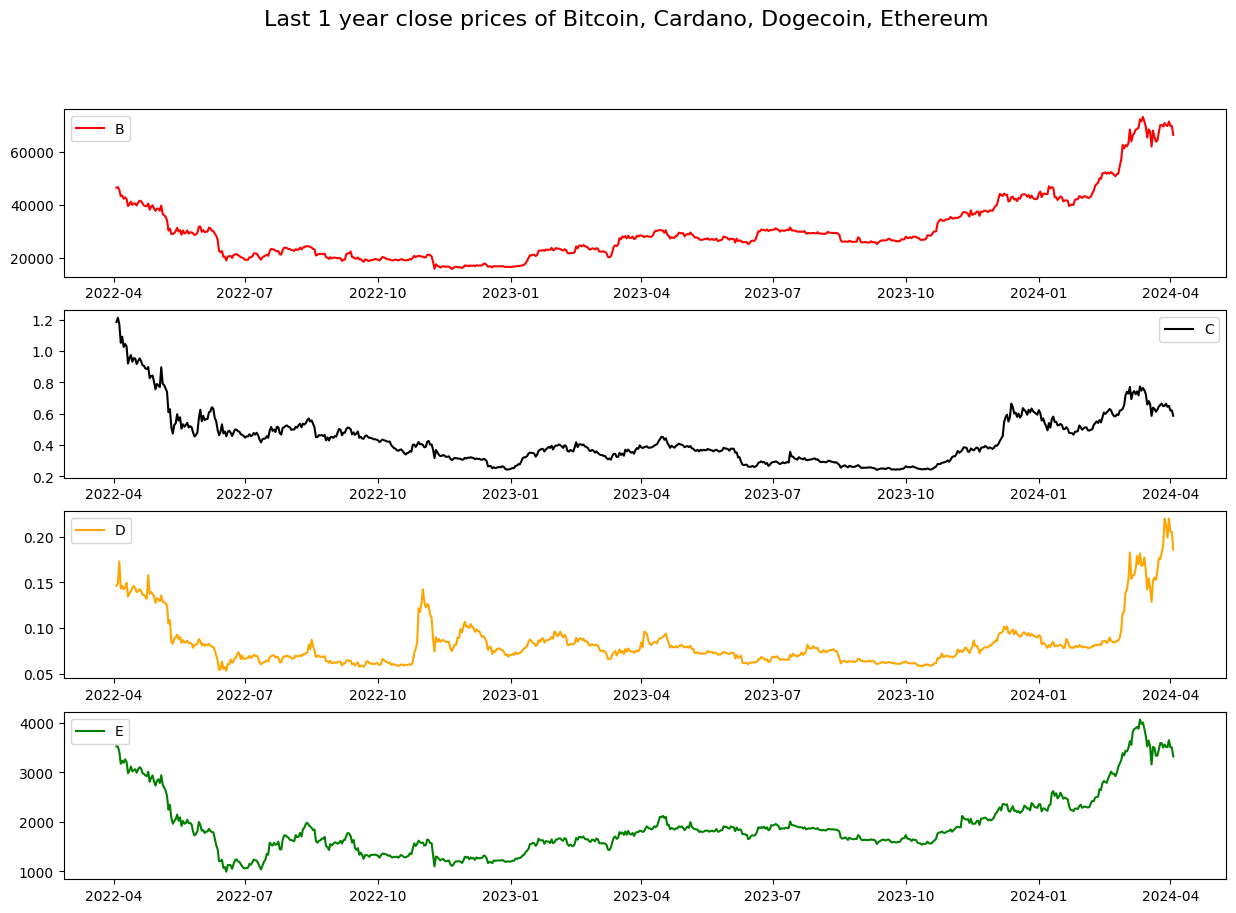

In [16]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Last 1 year close prices of Bitcoin, Cardano, Dogecoin, Ethereum", fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(last1year_bitcoindf['date'], last1year_bitcoindf['close'], color="red")
plt.legend("B")

plt.subplot(4, 1, 2)
plt.plot(last1year_cardanodf['date'], last1year_cardanodf['close'], color="black")
plt.legend("C")

plt.subplot(4, 1, 3)
plt.plot(last1year_dogecoindf['date'], last1year_dogecoindf['close'], color="orange")
plt.legend("D")

plt.subplot(4, 1, 4)
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['close'], color="green")
plt.legend("E")

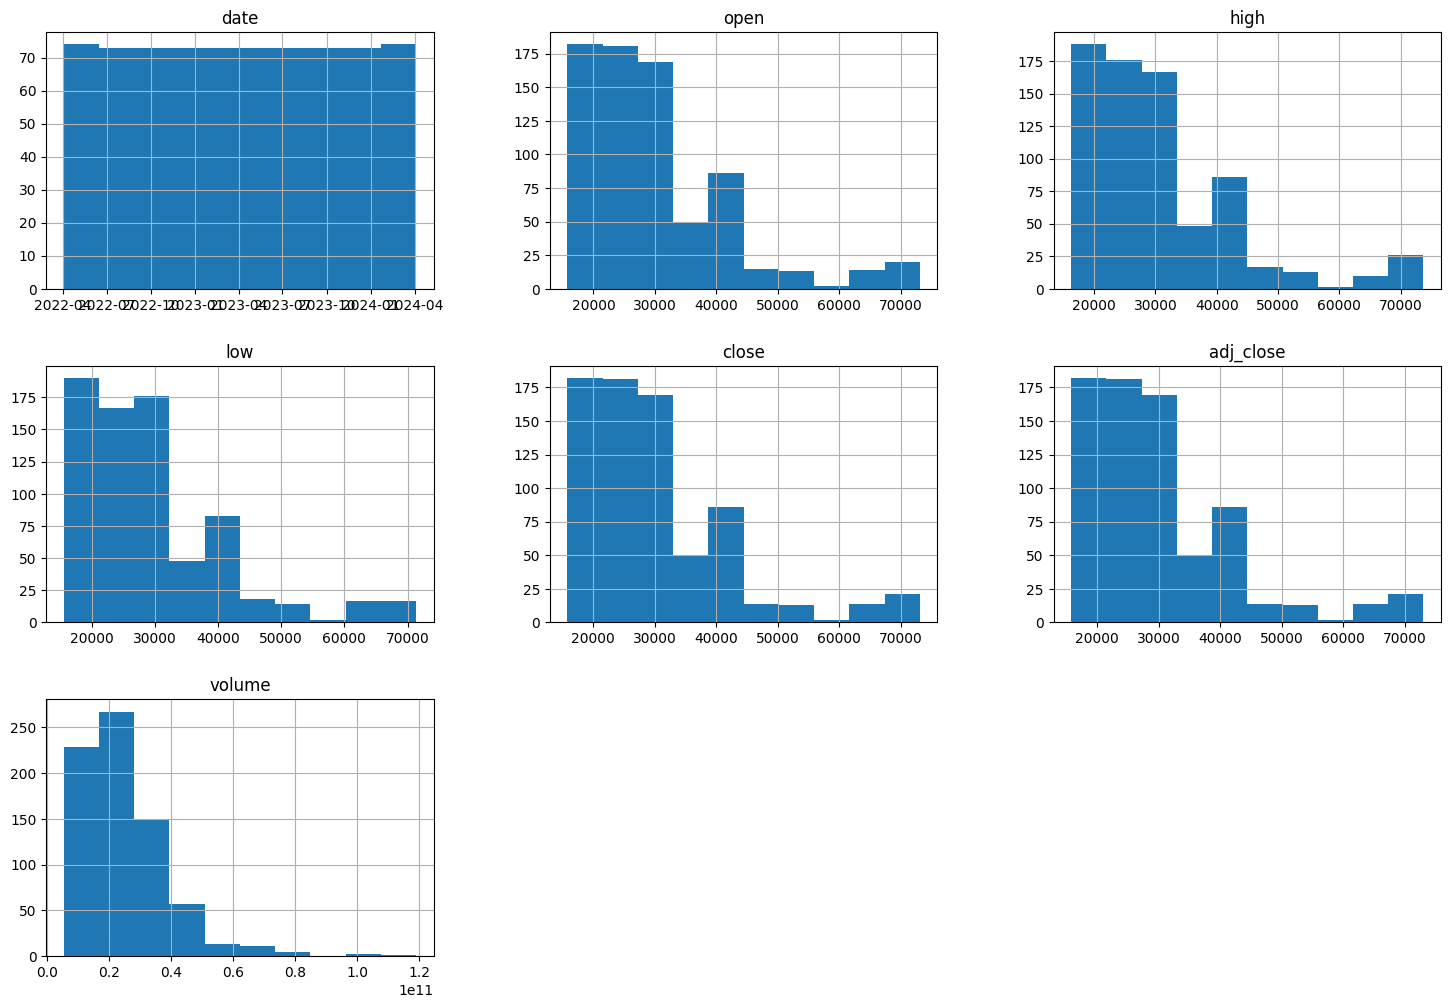

In [17]:
#histogram for all the coloumns of bitcoin dataset.S
bitcoin_numeric = bitcoindf.select_dtypes(exclude = ["bool"])
bitcoin_numeric.hist(figsize=(18,12))
plt.show()

In [18]:
closedf = bitcoindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (732, 2)


In [19]:
closedf = closedf[closedf['date'] > '2020-09-13']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  732


In [20]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(732, 1)


In [21]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1] #splitting
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (512, 1)
test_data:  (220, 1)


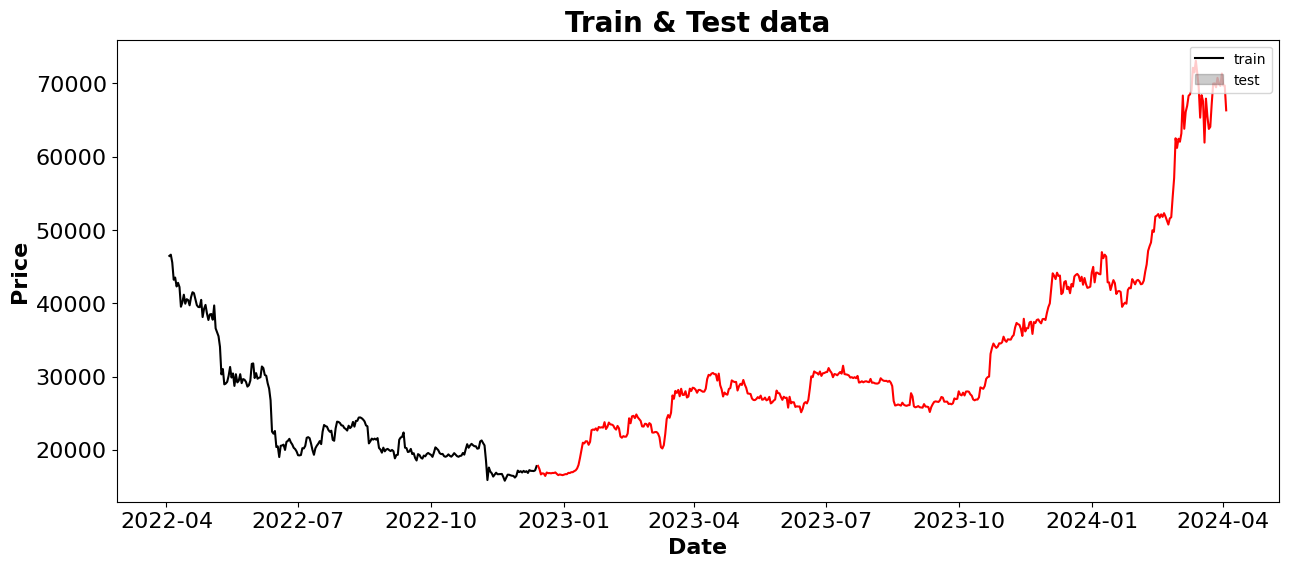

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['date'][:255], y = close_stock['close'][:255], color = 'black')
sns.lineplot(x = close_stock['date'][255:], y = close_stock['close'][255:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

In [23]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [24]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (496, 15)
y_train:  (496,)
X_test:  (204, 15)
y_test (204,)


In [25]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.13842690540210525
Root Mean squared Error - RMSE : 0.21144078674567077


In [27]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (496, 1)
Test data prediction: (204, 1)


In [28]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [29]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (732, 1)
Test predicted data:  (732, 1)


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [30]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = my_model.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [31]:
last_days = np.arange(1, time_step + 1)
pred_days = 30  # Define pred_days
day_pred = np.arange(time_step + 1, time_step + pred_days + 1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [32]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])
fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [33]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Cryptocurrency')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import numpy as np
import math

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

def predict_closing_prices(crypto_df):
    # Preprocess the data
    closedf = crypto_df[['date','close']]
    closedf = closedf[closedf['date'] > '2020-09-13']
    close_stock = closedf.copy()
    del closedf['date']

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    closedf = scaler.fit_transform(np.array(closedf).reshape(-1,1))

    # Split the data into training and testing sets
    training_size = int(len(closedf) * 0.70)
    test_size = len(closedf) - training_size
    train_data, test_data = closedf[0:training_size,:], closedf[training_size:len(closedf),:1]

    # Create dataset matrices
    time_step = 15
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    # Build the XGBoost model
    my_model = XGBRegressor(n_estimators=1000)
    my_model.fit(X_train, y_train, verbose=False)

    # Make predictions
    predictions = my_model.predict(X_test)

    # Evaluate the model
    print("Mean Absolute Error - MAE : ", mean_absolute_error(y_test, predictions))
    print("Root Mean Squared Error - RMSE : ", math.sqrt(mean_squared_error(y_test, predictions)))

    # Predict next 30 days closing prices
    x_input = test_data[len(test_data)-time_step:].reshape(1,-1)
    temp_input = list(x_input)
    temp_input = temp_input[0].tolist()

    lst_output = []
    pred_days = 30
    i = 0
    while i < pred_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[1:]).reshape(1,-1)
            yhat = my_model.predict(x_input)
            temp_input.extend(yhat.tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            yhat = my_model.predict(x_input)
            temp_input.extend(yhat.tolist())
            lst_output.extend(yhat.tolist())
            i += 1

    # Inverse scaling
    lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

    return lst_output

In [35]:
# Predict closing prices for Bitcoin
bitcoin_predictions = predict_closing_prices(bitcoindf)

# Display the predictions for Bitcoin
print("Bitcoin Predictions:", bitcoin_predictions)

# Predict closing prices for Dogecoin
dogecoin_predictions = predict_closing_prices(dogecoindf)

# Display the predictions for Dogecoin
print("Dogecoin Predictions:", dogecoin_predictions)

# Predict closing prices for Ethereum
ethereum_predictions = predict_closing_prices(ethereumdf)

# Display the predictions for Ethereum
print("Ethereum Predictions:", ethereum_predictions)

# Predict closing prices for Cardano
cardano_predictions = predict_closing_prices(cardanodf)

# Display the predictions for Cardano
print("Cardano Predictions:", cardano_predictions)

Mean Absolute Error - MAE :  0.13842690540210525
Root Mean Squared Error - RMSE :  0.21144078674567077
Bitcoin Predictions: [40869.18827169255, 40869.18827169255, 40869.18827169255, 40869.18827169255, 40869.18827169255, 40869.18827169255, 40869.18827169255, 40869.18827169255, 40869.18827169255, 40823.362476043214, 40677.82198938005, 40677.82198938005, 40789.31372375169, 40935.757509811156, 41081.29799647432, 39066.84130422881, 39059.457813511224, 39045.70512289157, 39168.550425667745, 38991.030749791156, 39001.03534556227, 38316.27634611703, 37827.33182355398, 37781.31990383244, 36065.039097940906, 36081.69122594226, 34027.36983103888, 34095.235107421744, 30942.149889197037, 30909.47230782277]
Mean Absolute Error - MAE :  0.047246681296352525
Root Mean Squared Error - RMSE :  0.10295292400685227
Dogecoin Predictions: [0.14222802036213875, 0.14222802036213875, 0.14222802036213875, 0.14222802036213875, 0.14222802036213875, 0.14222802036213875, 0.14222802036213875, 0.14222802036213875, 0.

Mean Absolute Error - MAE :  0.13842690540210525
Root Mean Squared Error - RMSE :  0.21144078674567077


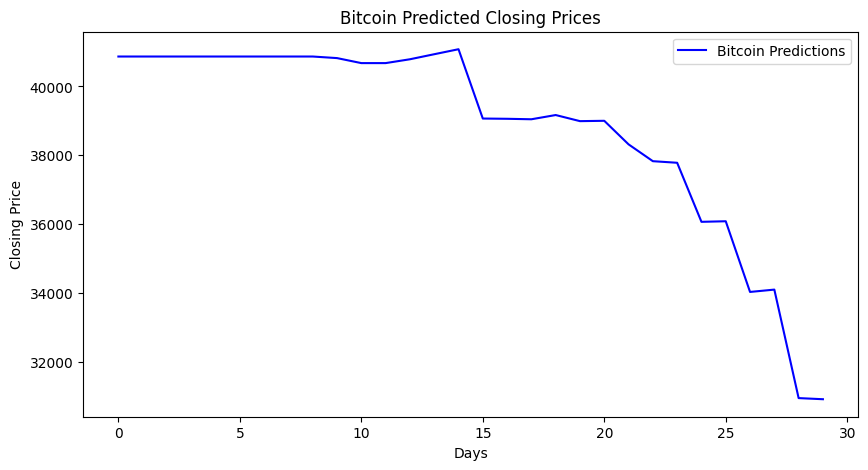

Mean Absolute Error - MAE :  0.047246681296352525
Root Mean Squared Error - RMSE :  0.10295292400685227


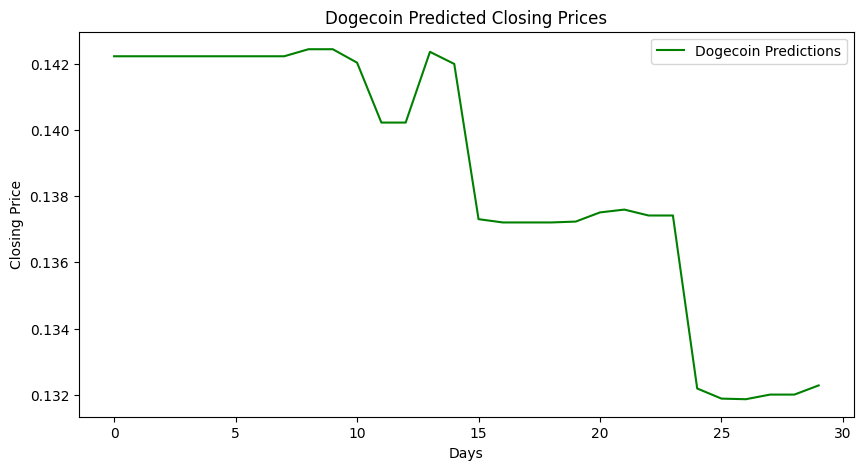

Mean Absolute Error - MAE :  0.08842578566212186
Root Mean Squared Error - RMSE :  0.1260879613934122


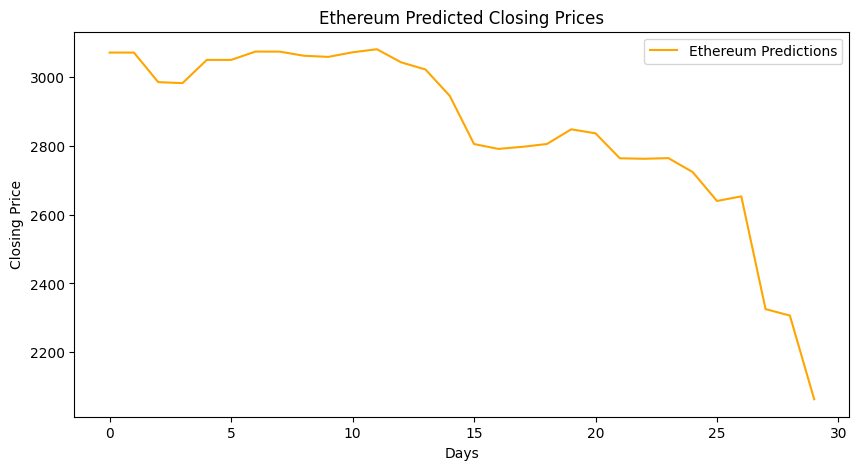

Mean Absolute Error - MAE :  0.02654460925763298
Root Mean Squared Error - RMSE :  0.04249826170879972


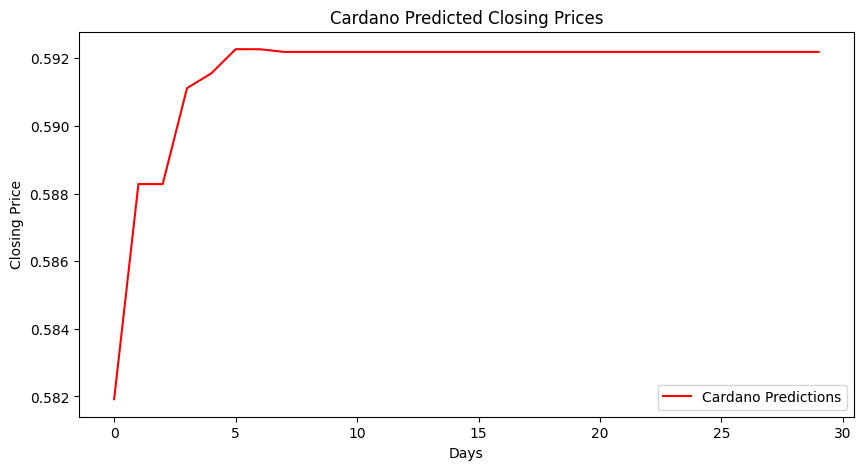

In [36]:
import matplotlib.pyplot as plt

# Predict closing prices for Bitcoin
bitcoin_predictions = predict_closing_prices(bitcoindf)

# Plot Bitcoin Predictions
plt.figure(figsize=(10, 5))
plt.plot(bitcoin_predictions, label='Bitcoin Predictions', color='blue')
plt.title('Bitcoin Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Predict closing prices for Dogecoin
dogecoin_predictions = predict_closing_prices(dogecoindf)

# Plot Dogecoin Predictions
plt.figure(figsize=(10, 5))
plt.plot(dogecoin_predictions, label='Dogecoin Predictions', color='green')
plt.title('Dogecoin Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Predict closing prices for Ethereum
ethereum_predictions = predict_closing_prices(ethereumdf)

# Plot Ethereum Predictions
plt.figure(figsize=(10, 5))
plt.plot(ethereum_predictions, label='Ethereum Predictions', color='orange')
plt.title('Ethereum Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Predict closing prices for Cardano
cardano_predictions = predict_closing_prices(cardanodf)

# Plot Cardano Predictions
plt.figure(figsize=(10, 5))
plt.plot(cardano_predictions, label='Cardano Predictions', color='red')
plt.title('Cardano Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [37]:
import numpy as np

In [38]:
import pickle

# Save the trained model
with open('my_model.pkl', 'wb') as file:
    pickle.dump(my_model, file)

# Save the training dataset
with open('train_dataset.pkl', 'wb') as file:
    pickle.dump(train_data, file)